In [61]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# List images in the current working directory
image_files = [f for f in os.listdir('.') if f.lower().endswith(('png', 'jpg', 'jpeg'))]

if len(image_files) < 2:
    print("Need at least two images in the directory.")
else:
    # Open the first two images
#     base = Image.open(image_files[4])
#     layer = Image.open(image_files[5])
#     left = Image.open(image_files[6])
#     right = Image.open(image_files[7])
#     top = Image.open(image_files[8])
#     background_img = Image.open(image_files[9]) # Load background image
    base = Image.open(image_files[0])
    layer = Image.open(image_files[1])
    top = Image.open(image_files[2])
    background_img = Image.open(image_files[3])

    l = [base, layer, left, right]
    



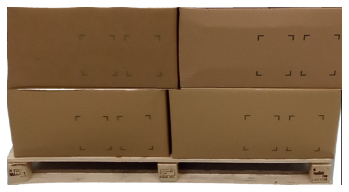

In [12]:
# Resize to the same width if necessary
width = min(img1.width, img2.width)
img1 = img1.resize((width, int(img1.height * width / img1.width)))
img2 = img2.resize((width, int(img2.height * width / img2.width)))

# Concatenate images vertically
img2= base
img1 = layer
new_height = img1.height + img2.height
result = Image.new('RGB', (width, new_height))
result.paste(img1, (0, 0))
result.paste(img2, (0, img1.height))

# Show result
plt.imshow(result)
plt.axis('off')
plt.show()

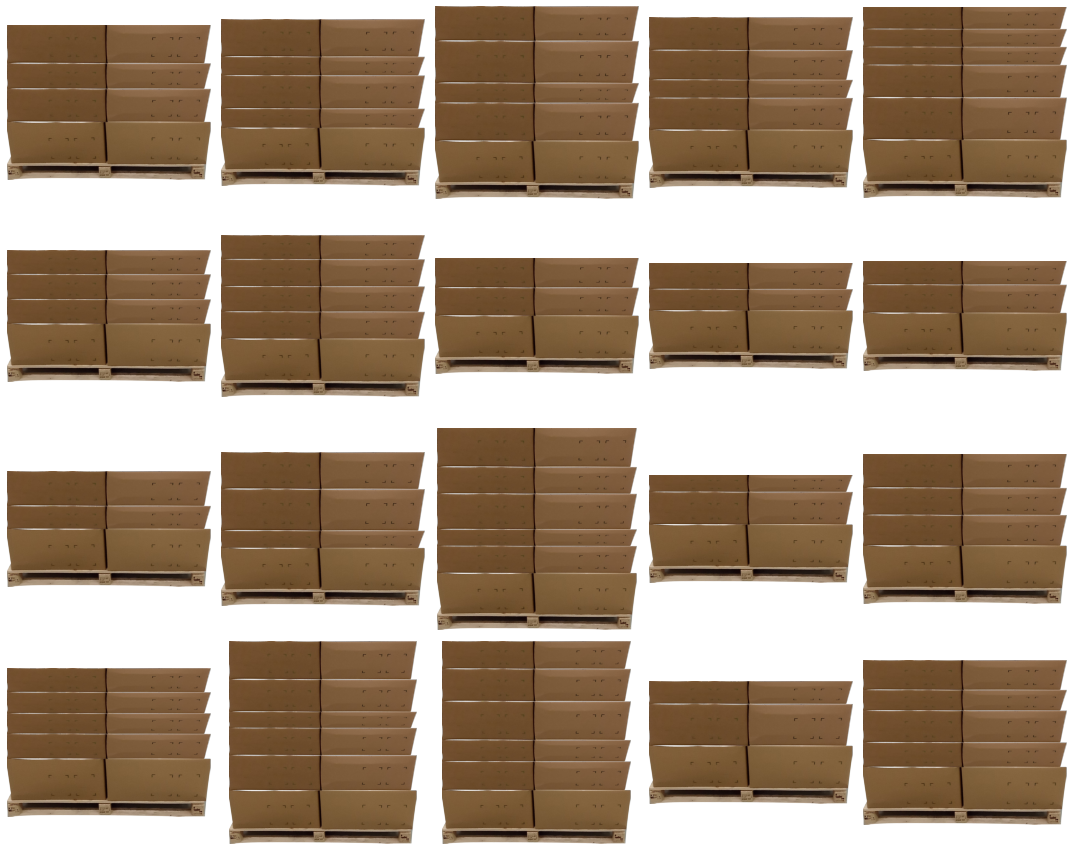

In [39]:
from PIL import Image
import random
import matplotlib.pyplot as plt

# Load images
base = Image.open(image_files[0])
layer = Image.open(image_files[1])

# Generate 20 images
output_images = []
for _ in range(20):
    num_layers = random.randint(2, 5)  # Random number of layers (2 to 5)

    # Resize layers with random heights and same width as base
    random_layers = [
        layer.resize((base.width, random.randint(100, 300))) for _ in range(num_layers)
    ]

    # Calculate final image height
    final_height = base.height + sum(l.height for l in random_layers)
    new_image = Image.new("RGBA", (base.width, final_height))

    # Paste layers in the correct order (Base at the bottom, layers above)
    y_offset = final_height - base.height  # Start from the bottom
    new_image.paste(base, (0, y_offset))

    for l in reversed(random_layers):  # Paste layers from bottom to top
        y_offset -= l.height
        new_image.paste(l, (0, y_offset))

    output_images.append(new_image)

# Display all images using Matplotlib
fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # 4 rows, 5 columns

for ax, img in zip(axes.flat, output_images):
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


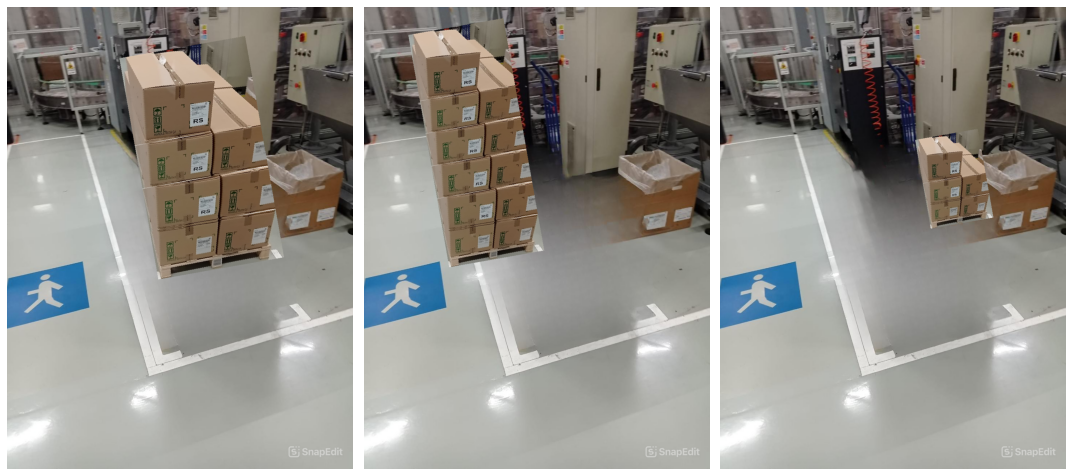

In [69]:
from PIL import Image
import random
import matplotlib.pyplot as plt


# Background size (large enough to fit all images)
bg_width = int(base.width * 2)
bg_height = int(base.height * 3)

# Generate 20 images
output_images = []
for _ in range(20):
    num_layers = random.randint(0, 6)  # Random number of layers (2 to 5)

    # Create stacked image
    stacked_height = base.height + sum(layer.height for _ in range(num_layers)) + top.height
    stacked_image = Image.new("RGBA", (base.width, stacked_height), (0, 0, 0, 0))  # Transparent background

    # Paste base layer first (correct order)
    y_offset = stacked_height - base.height  # Start from bottom
    stacked_image.paste(base, (0, y_offset))

    # Paste middle layers
    for _ in range(num_layers):
        y_offset -= layer.height  # Move up
        stacked_image.paste(layer, (0, y_offset), layer)

    # Paste top layer at the very top
    y_offset -= top.height
    stacked_image.paste(top, (0, y_offset), top)

    # Randomly resize final stacked image (0.5x to 1.5x)
    scale_factor = random.uniform(0.2, 0.7)
    new_width = int(stacked_image.width * scale_factor)
    new_height = int(stacked_image.height * scale_factor)
    stacked_resized = stacked_image.resize((new_width, new_height))

    # Ensure background is large enough
    bg_width = max(bg_width, new_width + 50)
    bg_height = max(bg_height, new_height + 50)

    # Create light grey background
#     background = Image.new("RGBA", (bg_width, bg_height), (200, 200, 200, 255))  
    background = background_img.copy()

    
        # Rotate the image 30 degrees counterclockwise
    stacked_rotated = stacked_resized.rotate(10, expand=True)

    # Random position on background
    x_offset = random.randint(0, max(0, bg_width - stacked_rotated.width))
    y_offset = random.randint(0, max(0, bg_height - stacked_rotated.height))

    # Create a copy of the background and paste the rotated object onto it
    background = background_img.copy()
    background.paste(stacked_rotated, (x_offset, y_offset), stacked_rotated)


    output_images.append(background)

# Display all images using Matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 12))  # 4 rows, 5 columns

for ax, img in zip(axes.flat, output_images):
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [58]:
import os
from PIL import Image
import random

# Ensure the folder exists
output_folder = "augmented1unsafe"
os.makedirs(output_folder, exist_ok=True)


# Resize the top layer to match the base width
top = top.resize((base.width, int(top.height * (base.width / top.width))))

# Get background size
bg_width, bg_height = background_img.size

# Generate 100 images
for i in range(100):
    num_layers = random.randint(4, 8)  # Random number of layers (2 to 5)

    # Create stacked image
    stacked_height = base.height + sum(layer.height for _ in range(num_layers)) + top.height
    stacked_image = Image.new("RGBA", (base.width, stacked_height), (0, 0, 0, 0))  # Transparent background

    # Paste base layer first (correct order)
    y_offset = stacked_height - base.height  # Start from bottom
    stacked_image.paste(base, (0, y_offset))

    # Paste middle layers
    for _ in range(num_layers):
        y_offset -= layer.height  # Move up
        stacked_image.paste(layer, (0, y_offset), layer)

    # Paste resized top layer at the very top
    y_offset -= top.height
    stacked_image.paste(top, (0, y_offset), top)

    # Randomly resize final stacked image (0.2x to 0.7x)
    scale_factor = random.uniform(0.2, 0.7)
    new_width = int(stacked_image.width * scale_factor)
    new_height = int(stacked_image.height * scale_factor)
    stacked_resized = stacked_image.resize((new_width, new_height))

    # Random position on background
    x_offset = random.randint(0, max(0, bg_width - new_width))
    y_offset = random.randint(0, max(0, bg_height - new_height))

    # Create a copy of the background and paste the object onto it
    background = background_img.copy()
    background.paste(stacked_resized, (x_offset, y_offset), stacked_resized)

    # Save the image
    output_path = os.path.join(output_folder, f"augmented_{i+1:03d}.png")
    background.save(output_path)

print(f"100 images saved in '{output_folder}' folder.")


100 images saved in 'augmented1unsafe' folder.
